# Image Processing for CV
image processing methods are integral to computer vision because they enable the extraction of meaningful information from visual data, paving the way for a wide range of applications, from object recognition to medical imaging and beyond.<br>These methods contribute to the development of robust and effective computer vision systems.


## Image Blending

In computer vision, the merging of two images is frequently referred to as image blending or image addition. In a variety of situations, this operation can be helpful in achieving particular goals. These are some actual case studies where the addition of two images is frequently used as a prerequisite to computer vision techniques:

- Image Fusion:  In applications like remote sensing or surveillance, combining information from different modalities can provide a more comprehensive understanding of the scene.
- HDR Imaging (High Dynamic Range): By combining multiple images taken at different exposure levels, HDR imaging aims to represent a broader range of luminance values, enhancing details in both dark and bright areas.
- Image Blending for Augmented Reality: When integrating virtual elements into real-world environments, blending the real and virtual images seamlessly is crucial for a realistic augmented reality experience.
- Medical Imaging:  Integrating information from MRI and CT scans, for example, to provide a more comprehensive view for diagnosis and treatment planning.

These examples show how image addition can be used in a variety of computer vision applications and how it can enhance overall analysis, information representation, and image quality.


## Addition and Blending of Images Using Python

When we discuss images, we know that they are all based on matrices, which can be binary (0, 1), grayscale (0-255), or RGB (255 255 255).<br>Thus, the image addition correspond to the sum of the two matrices' values.<br>In mathematics, matrices can be added only if they are of the same size, that is, they have the same dimension or order. So, two or more matrices of the same order can be added by adding the corresponding elements of the matrices.<br>


### Adding images of the same size
For example, let's say that we have picture A and picture B, size 2x2 pixels each:<br>
![addition of matrices 2x2](imgs\adding_two_imgs.jpg)

In Python, the process of adding two images involves reading the pixel values of corresponding pixels from both images and combining them to create a new image. The OpenCV library is commonly used for image processing tasks.<br>To add two images, you can use the **cv2.add()** function, which adds corresponding pixel values of two images.<br>For instance, if **image1** and **image2** are the two input images, the operation **result = cv2.add(image1, image2)** will add the pixel values of each corresponding pair of pixels from **image1** and **image2**, producing a new image stored in the result variable.

The shape of image1 is:  (600, 600, 3)
The shape of image2 is:  (600, 600, 3)


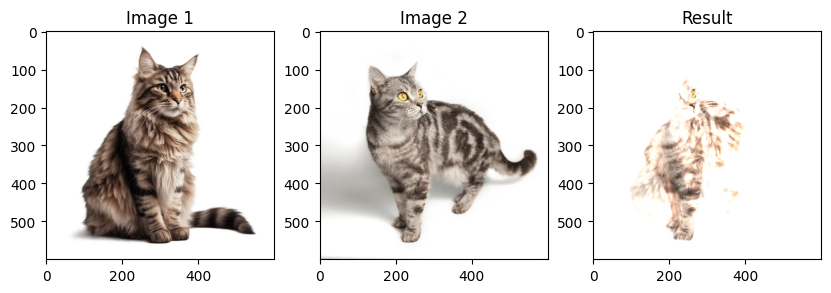

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load your images
image1 = cv2.imread('imgs/same_size/image1.png')
image2 = cv2.imread('imgs/same_size/image2.png')

shape1 = image1.shape
shape2 = image2.shape
print("The shape of image1 is: ", shape1)
print("The shape of image2 is: ", shape2)

# Check if the images have the same size
if shape1 != shape2:
    print("Error: Images have different sizes.")
else:
    # Add the images
    result = cv2.add(image1, image2)

    # Display the images and the result using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Result')

    plt.show()

### Adding images of different sizes 
In the real world, images often don't have the same size due to various reasons such as differences in camera resolutions, aspect ratios, or simply because they were captured under different conditions or with different devices. Handling images with different sizes is a common challenge in computer vision and image processing applications.<br>



#### Image resizing: 
One common approach is to resize images to a standard size before processing. This ensures that all images in a dataset or a processing pipeline have the same dimensions, making it easier to apply algorithms consistently.<br>
Below is an example to resize images to a common size. In this example, the images are resized to a specified width and height:

In [13]:
import os

# Function to resize images in a directory
def resize_images(input_dir, output_dir, target_width, target_height):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through each file in the input directory
    for filename in os.listdir(input_dir):
        # Check if the file is an image (you may want to add more checks based on your use case)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            # Read the image
            img_path = os.path.join(input_dir, filename)
            img = cv2.imread(img_path)

            # Resize the image
            resized_img = cv2.resize(img, (target_width, target_height))

            # Save the resized image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, resized_img)


In [16]:
# Example usage
input_directory = "imgs/dif_size"
output_directory = "imgs/dif_size/output"
target_width = 600
target_height = 600

resize_images(input_directory, output_directory, target_width, target_height)

In this example:
- input_directory is the directory containing the original images.
- output_directory is the directory where the resized images will be saved.
- target_width and target_height are the dimensions to which the images will be resized.

Make sure to replace the input directory with the path to your actual images. The resized images will be saved in the specified output directory. Adjust the target_width and target_height according to your requirements.

#### Image Cropping: 
Another approach is to crop images to a common region of interest (ROI) or aspect ratio. This is often done when you are interested in a specific part of the image, and the content of interest can be captured in a consistent manner across images.

In [ ]:
# Function to crop images in a directory
def crop_images(input_dir, output_dir, x, y, width, height):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through each file in the input directory
    for filename in os.listdir(input_dir):
        # Check if the file is an image (you may want to add more checks based on your use case)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            # Read the image
            img_path = os.path.join(input_dir, filename)
            img = cv2.imread(img_path)

            # Crop the image
            cropped_img = img[y:y+height, x:x+width]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, cropped_img)


In [ ]:
# Example usage
input_directory = "input_images"
output_directory = "cropped_images"
crop_x = 50
crop_y = 50
crop_width = 200
crop_height = 150